In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Підготовка тренувального датасету

In [ ]:
train = '/content/drive/MyDrive/data/train/train.csv'

df_train = pd.read_csv(train)

df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df_train.info()

In [ ]:
df_train.describe()

In [ ]:
import re

df_cleaned = df_train

# Функція для очищення тексту від цифр, знаків і спеціальних символів, крім ком і крапок
def clean_text_advanced(text):

    # Приводимо текст до нижнього регістру
    text = text.lower()
    # видаляємо все що не англ.
    text = re.sub(r"[^a-zA-Z.,\s]", "", text)

    # Видаляємо всі цифри
    text = re.sub(r'\d+', '', text)

    # Видаляємо символи пунктуації, окрім коми і крапки
    text = re.sub(r'[^\w\s,.]', '', text)

    # Видаляємо зайві символи нового рядка і замінюємо їх на пробіли
    text = text.replace('\n', ' ')

    # Видаляємо зайві пробіли
    text = re.sub(r'\s+', ' ', text).strip()

    # Видаляємо слова, довжина яких більше 40 символів
    text =  re.sub(r'\S{40,}', '', text)

    # Регулярний вираз для знаходження посилань
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url_pattern, '', text)

    # Видалення фраз, що повторюються більше двох разів підряд
    text = re.sub(r'(\b\w+\b)(\s+\1)+', r'\1', text)

    # Видалення повторюваних речень більше ніж два рази підряд
    text = re.sub(r'(\b.+?\b)(\s*\1)+', r'\1', text)

   # Видалення повторюваних однакових літер (наприклад, AAAAAAA)
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # Заміна 3 або більше однакових букв

    # Видалення повторюваних шаблонів, де кожна друга літера інша (наприклад, XAXAXA)
    text = re.sub(r'(.)(.)\1\2{2,}', r'\1\2', text)  # Заміна патернів повторів XAXAXA, XAXAXXAXX

    # Видаляємо повторювані послідовності сміху (ahahah, muahahah)
    text = re.sub(r'(ha|ah|mu|lol){2,}', '', text)

    # Видаляємо повторювані фрази більше ніж двічі (наприклад, "i hate you" або "die die die")
    text = re.sub(r'(\b\w+\b)(\s+\1){2,}', r'\1', text)

    # Видаляємо повторення фраз (двох і більше разів)
    text = re.sub(r'\b(\w+\b(?:\s+\w+\b){0,5})\s*(\1\s*)+', r'\1', text)

    # Видаляємо довгі повторення одного і того ж слова (більше 2 разів)
    text = re.sub(r'\b(\w+)\s+\1\s+\1(?:\s+\1)+', r'\1', text)

    # Видаляємо довгі рядки сміху (ahahaha, lol, muahaha) - залишаємо не більше 1-2 повторів
    text = re.sub(r'(\b(?:ha|ah|lol|mu|muah)+\b(?:\s*\b(?:ha|ah|lol|mu|muah)+\b){2,})', r'\1', text)

    return text

# Застосовуємо функцію clean_text_advanced до кожного коментаря в стовпці 'comment_text'
df_cleaned['comment_text'] = df_cleaned['comment_text'].apply(clean_text_advanced)

# Перевіряємо перші 5 очищених коментарів
print(df_cleaned[['comment_text']].head())



                                        comment_text
0  explanation why the edits made under my userna...
1  daww he matches this background colour im seem...
2  hey man, im really not trying to edit war. its...
3  more i cant make any real suggestions on impro...
4  you, sir, are my hero. any chance you remember...


In [ ]:
import pandas as pd
from transformers import BertTokenizer


# Ініціалізація токенайзера BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Функція для підрахунку кількості токенів у тексті
def count_tokens(text):

    tokens = tokenizer.encode(text, add_special_tokens=False)  # Токенізуємо текст
    return len(tokens)  # Повертаємо кількість токенів

# Підрахунок кількості токенів для кожного коментаря
df_cleaned['token_count'] = df_cleaned['comment_text'].apply(count_tokens)

# Виведення результатів
print(df_cleaned[['comment_text', 'token_count']].head())


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (587 > 512). Running this sequence through the model will result in indexing errors


                                        comment_text  token_count
0  explanation why the edits made under my userna...           54
1  daww he matches this background colour im seem...           20
2  hey man, im really not trying to edit war. its...           48
3  more i cant make any real suggestions on impro...          119
4  you, sir, are my hero. any chance you remember...           17


In [ ]:
df_cleaned.describe()

In [ ]:
# Сортуємо датасет за кількістю токенів у спадному порядку і виводимо топ 30 значень
top_30 = df_cleaned.sort_values(by='token_count', ascending=False).head(30)

# Виведення результату
print(top_30[['comment_text', 'token_count']])
# Виведення результату (повний текст коментарів разом із кількістю токенів)
# for idx, row in top_30.iterrows():
#     print(f"Comment {idx + 1}:\n{row['comment_text']}\nToken Count: {row['token_count']}\n{'-'*50}")


                                             comment_text  token_count
80819   references i dont like deleting other peoples ...         1373
147587  neautrality and balance. article is strong ant...         1361
48976   english translation of page tab kose mihalin t...         1279
115467  vice admiral arbuthnot failed with his fquadro...         1226
18698   added. you arenwo on my yahoo list. lets be ci...         1206
108277  , admits that, if less unjust and violent meas...         1202
18100   you swine. you vulgar little maggot. you worth...         1197
31585   chokhor rinpoche a brief biography of fourth c...         1139
31594   moving ahead i just found that i am unblocked ...         1127
141961  sincere reply to ninlil dear ninhil, i thank y...         1125
77841   deliver me, o lord, from the evil man rescue m...         1122
134370  thiru muruga kirupanandha variyar, popularly k...         1121
90741   reply in good faith to ninlil from srirangam d...         1119
82334 

In [ ]:
df_cleaned = df_cleaned.drop(columns=['token_count'])
df_cleaned.to_csv('/content/drive/MyDrive/data/train_cleaned.csv', index=False)


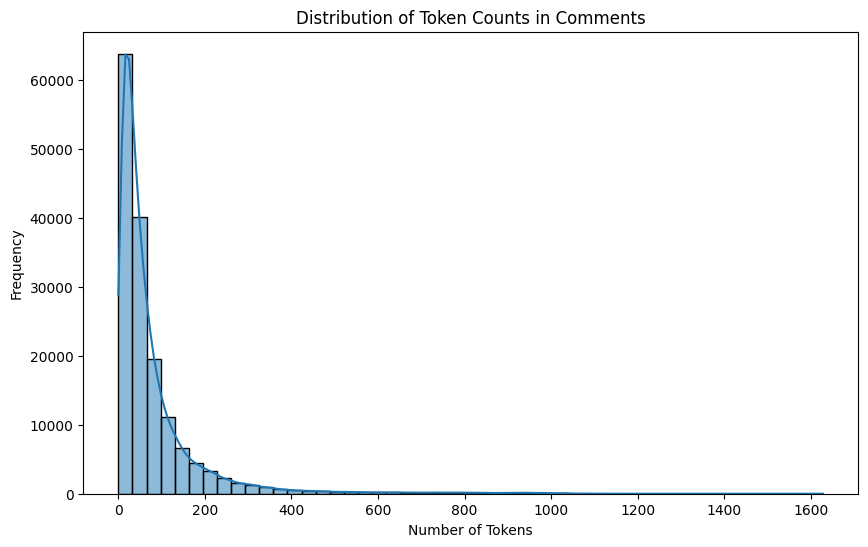

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Побудова діаграми за допомогою Seaborn
plt.figure(figsize=(10, 6))  # Розмір графіка
sns.histplot(df_train['token_count'], bins=50, kde=True)  # Гістограма кількості токенів
plt.title('Distribution of Token Counts in Comments')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


# Скрипт жпт

In [33]:
!pip install transformers rake-nltk nltk sumy


  Using cached rake_nltk-1.0.6-py3-none-any.whl.metadata (6.4 kB)
  Using cached sumy-0.11.0-py2.py3-none-any.whl.metadata (7.5 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... canceled
ERROR: Operation cancelled by user


In [31]:
train_clean = '/content/drive/MyDrive/data/train_cleaned.csv'

df_train_clean = pd.read_csv(train_clean)

df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159562 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [32]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer as SumyTokenizer
from sumy.summarizers.lsa import LsaSummarizer
from rake_nltk import Rake
from transformers import BertTokenizer

ModuleNotFoundError: No module named 'sumy'

In [ ]:
import nltk

# Завантажте токенізатор punkt
nltk.download('punkt')

In [ ]:
train_gpt = df_train_clean
# Завантаження стоп-слів для RAKE
nltk.download('stopwords')

# Ініціалізація токенайзера BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Функція для виділення ключових речень з тексту за допомогою sumy
def extract_important_sentences(text, sentences_count=5):
    parser = PlaintextParser.from_string(text, SumyTokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count)

    return ' '.join([str(sentence) for sentence in summary])

# Функція для виділення ключових фраз з тексту за допомогою RAKE
def extract_key_phrases(text, num_phrases=5):
    r = Rake()
    r.extract_keywords_from_text(text)
    return ' '.join(r.get_ranked_phrases()[:num_phrases])

# Основна функція для комбінування методів і скорочення тексту
def process_text(text, sentences_count=5, num_phrases=5):
    # Перевірка на NaN
    if pd.isna(text):
        return ""

    # Токенізуємо очищений текст і перевіряємо кількість токенів
    tokens = tokenizer.encode(text)

    # Якщо текст вже має менше ніж 512 токенів, просто повертаємо очищений текст
    if len(tokens) <= 512:
        return text

    # Якщо текст більше 512 токенів, скорочуємо його
    # Виділяємо ключові речення
    important_sentences = extract_important_sentences(text, sentences_count=sentences_count)

    # Виділяємо ключові фрази
    key_phrases = extract_key_phrases(text, num_phrases=num_phrases)

    # Об'єднуємо ключові речення та фрази
    combined_text = important_sentences + ' ' + key_phrases

    return combined_text

# Застосовуємо функцію process_text до кожного коментаря в стовпці 'comment_text'
# # Спочатку видаляємо NaN значення
# train_gpt = df_train_clean.dropna(subset=['comment_text'])
# train_gpt['comment_text'] = train_gpt['comment_text'].apply(process_text)

# Або, якщо ви хочете заповнити NaN значення
train_gpt['comment_text'] = train_gpt['comment_text'].fillna('').apply(process_text)


In [ ]:
train_gpt.to_csv('/content/drive/MyDrive/data/train_gpt.csv', index=False)

In [ ]:
train_gpt = '/content/drive/MyDrive/data/train_gpt.csv'

train_gpt = pd.read_csv(train_gpt)

train_gpt.head()

In [ ]:
import pandas as pd
from transformers import BertTokenizer


# Ініціалізація токенайзера BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Функція для підрахунку кількості токенів у тексті
def count_tokens(text):
    try:

      tokens = tokenizer.encode(text, add_special_tokens=False)  # Токенізуємо текст
      return len(tokens)  # Повертаємо кількість токенів
    except ValueError:
      print(text)
      return 0

# Підрахунок кількості токенів для кожного коментаря
train_gpt['token_count'] = train_gpt['comment_text'].apply(count_tokens)

# Виведення результатів
print(train_gpt[['comment_text', 'token_count']].head())

In [ ]:
# Сортуємо датасет за кількістю токенів у спадному порядку і виводимо топ 30 значень
top_30 = train_gpt.sort_values(by='token_count', ascending=False).head(30)

# Виведення результату
print(top_30[['comment_text', 'token_count']])
# Виведення результату (повний текст коментарів разом із кількістю токенів)
# for idx, row in top_30.iterrows():
#     print(f"Comment {idx + 1}:\n{row['comment_text']}\nToken Count: {row['token_count']}\n{'-'*50}")


In [ ]:
# Видаляємо всі рядки, де кількість токенів менше 3
train_gpt = train_gpt[train_gpt['token_count'] >= 1]

# Перевіряємо результат
print(train_gpt[['comment_text', 'token_count']])


In [ ]:
# Сортуємо датасет за кількістю токенів у зростаючому порядку і виводимо топ 30 значень
shortest_30 = train_gpt.sort_values(by='token_count', ascending=True).head(30)

# Виведення результату (короткі коментарі та кількість токенів)
shortest_30


In [ ]:
train_gpt.shape

In [ ]:
train_gpt_drop_small_token = train_gpt

In [ ]:
train_gpt_drop_small_token = train_gpt_drop_small_token.drop(columns=['token_count'])
train_gpt_drop_small_token.to_csv('/content/drive/MyDrive/data/train_gpt_drop_small_token.csv', index=False)


# скрипти kлауд

# train_claud

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import numpy as np

train_claud = df_train_clean

class TextSummarizer:
    def __init__(self):
        # Завантажуємо необхідні ресурси NLTK
        nltk.download('punkt')
        nltk.download('stopwords')
        self.stop_words = stopwords.words('english')

    def preprocess_text(self, text):
        # Розбиваємо текст на речення
        sentences = sent_tokenize(text)

        # Токенізація та видалення стоп-слів
        word_tokens = []
        for sentence in sentences:
            words = word_tokenize(sentence.lower())
            words = [w for w in words if w.isalnum() and w not in self.stop_words]
            word_tokens.extend(words)

        return sentences, word_tokens

    def get_sentence_scores(self, sentences, word_tokens):
        # Створюємо частотний розподіл слів
        freq_dist = FreqDist(word_tokens)

        # Обчислюємо оцінки для кожного речення
        sentence_scores = {}
        for i, sentence in enumerate(sentences):
            words = word_tokenize(sentence.lower())
            words = [w for w in words if w.isalnum()]
            score = sum([freq_dist[word] for word in words if word not in self.stop_words])
            sentence_scores[i] = score / len(words) if words else 0

        return sentence_scores

    def summarize(self, text, target_length=512):
        # Попередня обробка тексту
        sentences, word_tokens = self.preprocess_text(text)

        # Отримуємо оцінки речень
        sentence_scores = self.get_sentence_scores(sentences, word_tokens)

        # Сортуємо речення за оцінками
        sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

        # Вибираємо найважливіші речення
        selected_sentences = []
        current_length = 0

        for sentence_idx, _ in sorted_sentences:
            sentence = sentences[sentence_idx]
            sentence_length = len(sentence)

            if current_length + sentence_length <= target_length:
                selected_sentences.append((sentence_idx, sentence))
                current_length += sentence_length
            else:
                break

        # Відновлюємо оригінальний порядок речень
        summary = ' '.join([sentence for _, sentence in sorted(selected_sentences)])

        return summary

# Приклад використання
summarizer = TextSummarizer()

# Застосовуємо метод summarize до кожного коментаря у колонці 'comment_text'
train_claud['comment_text'] = train_claud['comment_text'].apply(lambda x: summarizer.summarize(x, target_length=512))

# Переглядаємо результати
print(train_claud['comment_text'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    explanation why the edits made under my userna...
1    daww he matches this background colour im seem...
2    hey man, im really not trying to edit war. its...
3    more i cant make any real suggestions on impro...
4    you, sir, are my hero. any chance you remember...
Name: comment_text, dtype: object


In [ ]:
train_claud.to_csv('/content/drive/MyDrive/data/train_claud.csv', index=False)

In [ ]:
import pandas as pd
from transformers import BertTokenizer


# Ініціалізація токенайзера BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Функція для підрахунку кількості токенів у тексті
def count_tokens(text):
    try:

      tokens = tokenizer.encode(text, add_special_tokens=False)  # Токенізуємо текст
      return len(tokens)  # Повертаємо кількість токенів
    except ValueError:
      print(text)
      return 0

# Підрахунок кількості токенів для кожного коментаря
train_claud['token_count'] = train_claud['comment_text'].apply(count_tokens)

# Виведення результатів
print(train_claud[['comment_text', 'token_count']].head())

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                        comment_text  token_count
0  explanation why the edits made under my userna...           54
1  daww he matches this background colour im seem...           20
2  hey man, im really not trying to edit war. its...           48
3  more i cant make any real suggestions on impro...           94
4  you, sir, are my hero. any chance you remember...           17


In [ ]:
# Сортуємо датасет за кількістю токенів у спадному порядку і виводимо топ 30 значень
top_30 = train_claud.sort_values(by='token_count', ascending=False).head(30)

# Виведення результату
print(top_30[['comment_text', 'token_count']])
# Виведення результату (повний текст коментарів разом із кількістю токенів)
# for idx, row in top_30.iterrows():
#     print(f"Comment {idx + 1}:\n{row['comment_text']}\nToken Count: {row['token_count']}\n{'-'*50}")


                                             comment_text  token_count
41190   u djelima se ranijih knjievnika zrcali pravo b...          198
32263   dhladh perimeneis na kanw auto pou mou zhthses...          186
69498   you biased.you mongrol swine..dickk sukker hea...          172
6412    here the most authoritative photo  el puente d...          168
100938  youre a terrible bum and a snob. youre a simia...          166
68619   bienvenue bonjour, , et bienvenue sur wikipdia...          166
75615   bienvenue bonjour, , et bienvenue wikipdia. bi...          165
145135  riots kearney, r.n. the riots in ceylon a symp...          162
72582   you r a jerk you son of a bitch.. uss page ko ...          162
142915  you suck hello j. delanoy, u suck. i could pro...          160
7814    amazons, after all i think i found the source ...          157
125416  mattseoand nochex spam on wikipedia spam domai...          157
64457   you no for good..rascal. i give u proof that d...          156
73294 

In [ ]:
# Сортуємо датасет за кількістю токенів у зростаючому порядку і виводимо топ 30 значень
shortest_30 = train_claud.sort_values(by='token_count', ascending=True).head(100)

# Виведення результату (короткі коментарі та кількість токенів)
shortest_30


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,token_count
50377,86a9bbf85509e06b,,0,0,0,0,0,0,0
27170,47e1666c4239adc8,,0,0,0,0,0,0,0
64919,adb8a5eb90ec3c59,,0,0,0,0,0,0,0
64904,adac7518742a67c6,,0,0,0,0,0,0,0
75851,caf3f007320dab3f,,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
86643,e7ba0a7ed5d10cf0,,0,0,0,0,0,0,0
97112,0788a74fe42c6955,,1,0,0,0,0,0,0
59525,9f7101f686210535,,0,0,0,0,0,0,0
69491,b9dc7db83672a4ca,,0,0,0,0,0,0,0


In [ ]:
# Видаляємо всі рядки, де кількість токенів менше 3
train_claud_0 = train_claud[train_claud['token_count'] > 1]

# Перевіряємо результат
print(train_claud_0[['comment_text', 'token_count']])

                                             comment_text  token_count
0       explanation why the edits made under my userna...           54
1       daww he matches this background colour im seem...           20
2       hey man, im really not trying to edit war. its...           48
3       more i cant make any real suggestions on impro...           94
4       you, sir, are my hero. any chance you remember...           17
...                                                   ...          ...
159566  and for the second time of asking, when your v...           51
159567  you should be ashamed of yourself that is a ho...           19
159568  spitzer umm, theres no actual article for pros...           16
159569  and it looks like it was actually you who put ...           26
159570  and . i really dont think you understand. i ca...           40

[158728 rows x 2 columns]


In [ ]:
train_claud_0.to_csv('/content/drive/MyDrive/data/train_claud_0.csv', index=False)

# train_claud_2

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer
import re

train_claud_2 = df_train_clean

class SmartBertTruncator:
    def __init__(self, model_name='bert-base-multilingual-cased'):
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        self.stop_words = set(stopwords.words('english') + list(punctuation))

    def count_bert_tokens(self, text):
        return len(self.tokenizer.encode(text)) - 2  # Віднімаємо [CLS] та [SEP]

    def extract_keywords(self, text, top_n=10):
        vectorizer = TfidfVectorizer(stop_words=list(self.stop_words))
        try:
            tfidf_matrix = vectorizer.fit_transform([text])
            feature_names = vectorizer.get_feature_names_out()
            scores = zip(feature_names, np.asarray(tfidf_matrix.sum(axis=0)).ravel())
            sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
            return [word for word, score in sorted_scores[:top_n]]
        except:
            words = word_tokenize(text.lower())
            words = [w for w in words if w not in self.stop_words and w.isalnum()]
            return [w for w, _ in FreqDist(words).most_common(top_n)]

    def calculate_sentence_weights(self, sentences, keywords):
        weights = {}
        for i, sentence in enumerate(sentences):
            weight = 0
            if i == 0 or i == len(sentences) - 1:
                weight += 3
            elif i < len(sentences) * 0.1 or i > len(sentences) * 0.9:
                weight += 2
            sentence_words = set(word_tokenize(sentence.lower()))
            keywords_found = sum(1 for keyword in keywords if keyword in sentence_words)
            weight += keywords_found * 2
            token_count = self.count_bert_tokens(sentence)
            if 10 <= token_count <= 30:
                weight += 1
            significant_words = [w for w in sentence_words if w not in self.stop_words and w.isalnum()]
            weight += len(significant_words) / len(sentence_words) if len(sentence_words) > 0 else 0
            weights[i] = weight
        return weights

    def smart_truncate(self, text, max_tokens=512, min_tokens=50):
        if not text or not isinstance(text, str):
            return ""

        sentences = sent_tokenize(text)
        if not sentences:
            return text if self.count_bert_tokens(text) <= max_tokens else text[:max_tokens]

        keywords = self.extract_keywords(text)
        weights = self.calculate_sentence_weights(sentences, keywords)
        sorted_sentences = sorted(weights.items(), key=lambda x: x[1], reverse=True)

        selected_indices = []
        total_tokens = 0

        if len(sentences) >= 2:
            selected_indices.extend([0, len(sentences)-1])
            total_tokens += self.count_bert_tokens(sentences[0])
            total_tokens += self.count_bert_tokens(sentences[-1])

        for idx, _ in sorted_sentences:
            if idx in selected_indices:
                continue
            sentence_tokens = self.count_bert_tokens(sentences[idx])
            if total_tokens + sentence_tokens <= max_tokens - 2:
                selected_indices.append(idx)
                total_tokens += sentence_tokens
            if total_tokens >= min_tokens:
                break

        selected_indices.sort()
        truncated_text = ' '.join(sentences[i] for i in selected_indices)

        if self.count_bert_tokens(truncated_text) > max_tokens:
            truncated_text = self.tokenizer.decode(self.tokenizer.encode(truncated_text)[:max_tokens-1] + [self.tokenizer.sep_token_id])

        return truncated_text

    def prepare_for_bert(self, text, max_tokens=512):
        if not isinstance(text, str):
            return ""
        return self.smart_truncate(text, max_tokens)

# Приклад використання
truncator = SmartBertTruncator()

# Застосовуємо метод prepare_for_bert до кожного коментаря у колонці 'comment_text'
train_claud_2['comment_text'] = train_claud_2['comment_text'].apply(lambda x: truncator.prepare_for_bert(x))

# Переглядаємо результати
print(train_claud_2['comment_text'].head())

0    explanation why the edits made under my userna...
1    daww he matches this background colour im seem...
2    hey man, im really not trying to edit war. its...
3    more i cant make any real suggestions on impro...
4    you, sir, are my hero. any chance you remember...
Name: comment_text, dtype: object


In [ ]:
train_claud_2.to_csv('/content/drive/MyDrive/data/train_claud_2.csv', index=False)

In [2]:
train_claud_2 = '/content/drive/MyDrive/data/train_claud_2.csv'

train_claud_2 = pd.read_csv(train_claud_2)

train_claud_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   158814 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
 8   token_count    159571 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 11.0+ MB


In [12]:
import pandas as pd
from transformers import BertTokenizer


# Ініціалізація токенайзера BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
nan_count = []
# Функція для підрахунку кількості токенів у тексті
def count_tokens(text):
    try:

      tokens = tokenizer.encode(text, add_special_tokens=False)  # Токенізуємо текст
      return len(tokens)  # Повертаємо кількість токенів
    except ValueError:
      nan_count.append(text)
      return 0

# Підрахунок кількості токенів для кожного коментаря
train_claud_2['token_count'] = train_claud_2['comment_text'].apply(count_tokens)

# Виведення результатів
print(train_claud_2[['comment_text', 'token_count']].head())
print(len(nan_count))

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                        comment_text  token_count
0  explanation why the edits made under my userna...           54
1  daww he matches this background colour im seem...           20
2  hey man, im really not trying to edit war. its...           48
3  more i cant make any real suggestions on impro...           94
4  you, sir, are my hero. any chance you remember...           17
757


In [13]:
# Сортуємо датасет за кількістю токенів у спадному порядку і виводимо топ 30 значень
top_30 = train_claud_2.sort_values(by='token_count', ascending=False).head(30)

# Виведення результату
print(top_30[['comment_text', 'token_count']])
# Виведення результату (повний текст коментарів разом із кількістю токенів)
# for idx, row in top_30.iterrows():
#     print(f"Comment {idx + 1}:\n{row['comment_text']}\nToken Count: {row['token_count']}\n{'-'*50}")


                                             comment_text  token_count
41190   u djelima se ranijih knjievnika zrcali pravo b...          198
32263   dhladh perimeneis na kanw auto pou mou zhthses...          186
69498   you biased.you mongrol swine..dickk sukker hea...          166
125416  mattseoand nochex spam on wikipedia spam domai...          157
39992   online tools documents inc. spam on wikipedia ...          151
66783   name xhamia muderis ali efendi build on imam i...          150
66555   backgroundcolor f border px solid aborderright...          150
143257  alright, here is my kind of templates i would ...          150
8283    lensmansbcglobal.net kim burrafato he was ther...          148
80663   to kralizec you are a unintelligent, dull, bra...          147
40265   i can proove that the disney page was last cha...          146
18961   that could be done by replacing the for loop a...          146
138179  somebody live jennifer hudsontab btabnone jane...          146
52137 

In [ ]:
# Сортуємо датасет за кількістю токенів у зростаючому порядку і виводимо топ 30 значень
shortest_30 = train_claud_2_0.sort_values(by='token_count', ascending=True).head(30)

# Виведення результату (короткі коментарі та кількість токенів)
shortest_30

# Виведення результату (повний текст коментарів разом із кількістю токенів)
# for idx, row in shortest_30.iterrows():
#     print(row)


In [27]:
# Видаляємо всі рядки, де кількість токенів менше 3
train_claud_2_0 = train_claud_2[train_claud_2['token_count'] > 1]

# Перевіряємо результат
print(train_claud_2_0[['comment_text', 'token_count']])

                                             comment_text  token_count
0       explanation why the edits made under my userna...           54
1       daww he matches this background colour im seem...           20
2       hey man, im really not trying to edit war. its...           48
3       more i cant make any real suggestions on impro...           94
4       you, sir, are my hero. any chance you remember...           17
...                                                   ...          ...
159566  and for the second time of asking, when your v...           51
159567  you should be ashamed of yourself that is a ho...           19
159568  spitzer umm, theres no actual article for pros...           16
159569  and it looks like it was actually you who put ...           26
159570  and . i really dont think you understand. i ca...           40

[158728 rows x 2 columns]


In [29]:
train_claud_2_0.to_csv('/content/drive/MyDrive/data/train_claud_2_0.csv', index=False)